Use breast cancer dataset, build classification model using k-nn classifier for predicting whether a person suffers from cancer or not. Find the best value of ‘k’ for breast cancer dataset. Evaluate the performance of your model for different ‘k’ values.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as m

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/kajalpanda1/DatasetRepository/master/Breast_Cancer_Dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
feature_df=df.drop(columns=['id','Unnamed: 32','diagnosis']) 
target_df=df['diagnosis']

In [43]:
feature_df.shape

(569, 30)

In [42]:
target_df.shape

(569,)

In [10]:
ss=StandardScaler()
feature_df=ss.fit_transform(feature_df)

In [11]:
X_train, X_test, y_train, y_test=train_test_split(feature_df,target_df,test_size=0.3,random_state=0)

In [21]:
neighbors=np.arange(1,21)
train_accuracy=np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

In [22]:
for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    train_accuracy[i]=knn.score(X_train,y_train)
    test_accuracy[i]=knn.score(X_test,y_test)

In [32]:
for i in range(len(train_accuracy)): 
    print(i,train_accuracy[i],'\t',test_accuracy[i])

0 1.0 	 0.935672514619883
1 0.9773869346733668 	 0.9473684210526315
2 0.9849246231155779 	 0.9473684210526315
3 0.9698492462311558 	 0.9532163742690059
4 0.9698492462311558 	 0.9590643274853801
5 0.9748743718592965 	 0.9590643274853801
6 0.9723618090452262 	 0.9532163742690059
7 0.9748743718592965 	 0.9473684210526315
8 0.9723618090452262 	 0.9590643274853801
9 0.9673366834170855 	 0.9590643274853801
10 0.9698492462311558 	 0.9590643274853801
11 0.9623115577889447 	 0.9590643274853801
12 0.9673366834170855 	 0.9590643274853801
13 0.9597989949748744 	 0.9590643274853801
14 0.9597989949748744 	 0.9649122807017544
15 0.9597989949748744 	 0.9532163742690059
16 0.9597989949748744 	 0.9473684210526315
17 0.9597989949748744 	 0.9473684210526315
18 0.9623115577889447 	 0.9473684210526315
19 0.9547738693467337 	 0.9473684210526315


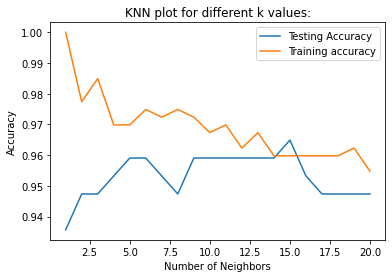

In [25]:
plt.title('KNN plot for different k values:')
plt.plot(neighbors,test_accuracy,label='Testing Accuracy')
plt.plot(neighbors,train_accuracy,label='Training accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [39]:
model=KNeighborsClassifier(n_neighbors=14)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [40]:
y_pred=model.predict(X_test)

In [41]:
print(m.accuracy_score(y_test,y_pred)*100)

95.90643274853801
